## Смешивание изображений

In [1]:
import cv2 as cv
img1 = cv.imread('car.jpg')
img1 = cv.pyrUp(img1)
img1 = cv.pyrUp(img1)
img1 = img1[0:750, 0:750]
img2 = cv.imread('green.jpg')
img2 = cv.pyrUp(img2)
print(img2.shape)
img2 = img2[0:750, 0:750]
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

(960, 1704, 3)


Создайте анимацию с переходом из одного изображения в другое. Попытайтесь доавбить еще одно изображение.

In [3]:
import time 
for i in range(10):
    dst = cv.addWeighted(img1,1-i/10,img2,i/10,0)
    cv.imshow('dst',dst)
    cv.waitKey(500)
    cv.destroyAllWindows()

## Побитовые операции

In [6]:
img1 = cv.imread('car.jpg')
img1 = cv.pyrUp(img1)
img2 = cv.imread('Gmail-logo.png')
# Логотип будет помещен в левый верхний угол, но со смещением в 100 пикселей по вертикали и горизонтали
rows,cols,channels = img2.shape
roi = img1[100:rows+100, 100:cols+100]
# Создадим маску и ее инвертированную копию
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Заполним площадь на первом изображении нашей маской
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Забираем область логотипа из второго изображения
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Добавляем логотип в выделенную область ROI (Region Of Interest)
dst = cv.add(img1_bg,img2_fg)
# Не забываем добавить наше смещение при добавлении логотипа
img1[100:rows+100, 100:cols+100] = dst
cv.imshow('gray',img2gray)
cv.imshow('mask_inverted',mask_inv)
cv.imshow('img_black-out',img1_bg)
cv.imshow('img_foreground',img2_fg)
cv.imshow('result',img1)
cv.waitKey(0)
cv.destroyAllWindows()

## Трансформации изображения

In [7]:
# Масштабирование
img = cv.imread('car.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
# Или можно написать
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
cv.imshow('result',res)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
# Сдвиг
import numpy as np
img = cv.imread('car.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,200],[0,1,200]]) # Сдвиг в 200 пикселей по горизонтали и вертикали
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Поворот
img = cv.imread('car.jpg',0)
rows,cols = img.shape
# cols-1 и rows-1 это последние значения координат
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

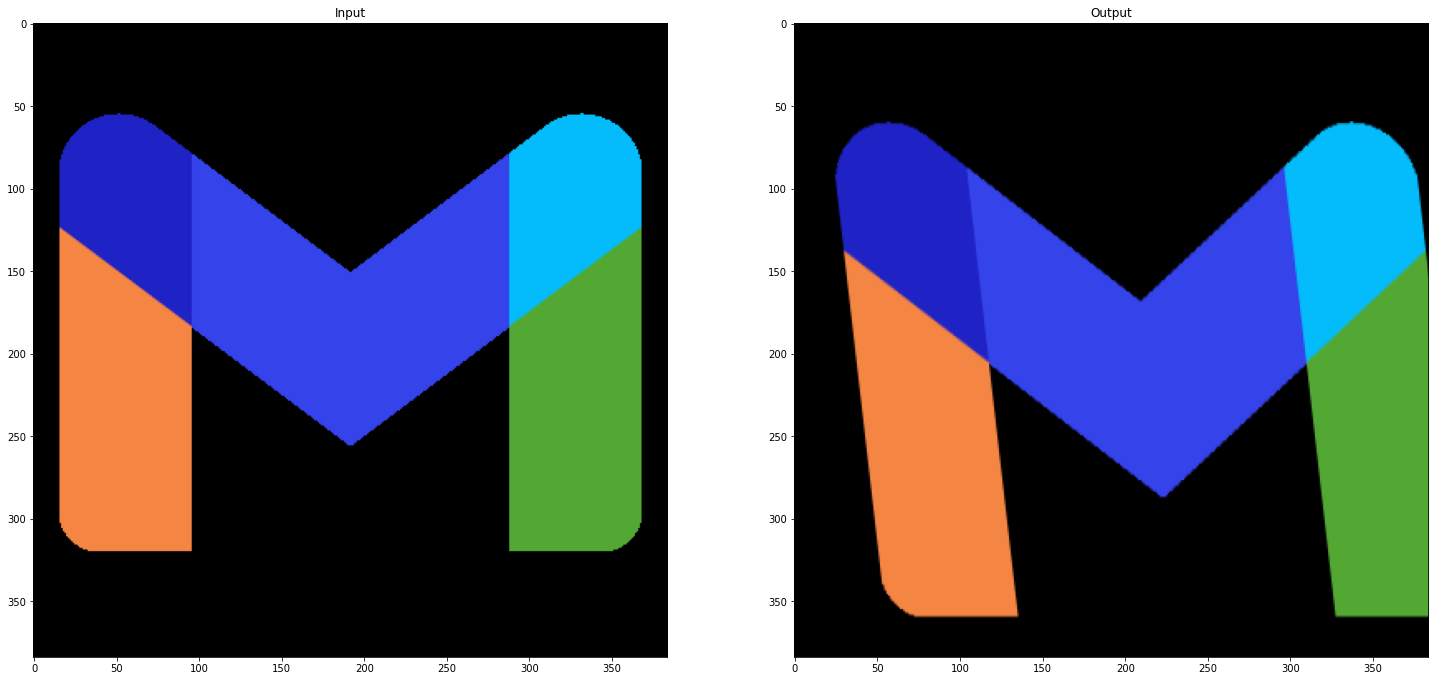

In [11]:
# Аффинное преобразование
import matplotlib.pyplot as plt
img = cv.imread('Gmail-logo.png')
rows,cols,ch = img.shape
pts1 = np.float32([[34,400],[199,400],[108,15]])
pts2 = np.float32([[84,450],[249,450],[108,15]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax1.set_title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

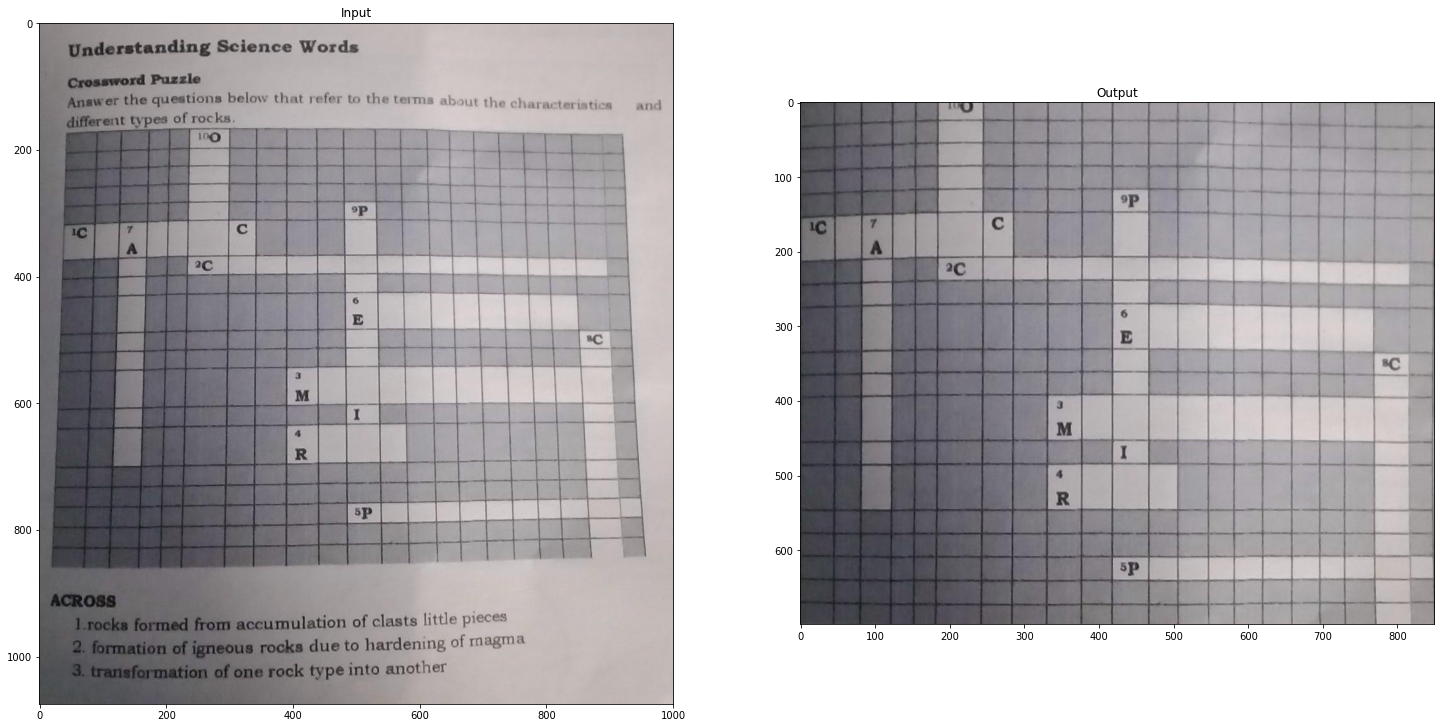

In [12]:
# Перспективное преобразование
img = cv.imread('crossword.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[43,174],[919,175],[20,859],[956,841]])
pts2 = np.float32([[0,0],[850,0],[0,700],[850,700]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(850,700))
fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(121)
ax1.imshow(img)
ax1.set_title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Поменяйте значения в блоках кода, для того чтобы освоить их на своих изображениях и напишите их ниже.

In [13]:
# Масштабирование
img = cv.imread('car.jpg')
res = cv.resize(img,None,fx=1.3, fy=1, interpolation = cv.INTER_CUBIC)
# Или можно написать
height, width = img.shape[:2]
res = cv.resize(img,(3*width, 3*height), interpolation = cv.INTER_CUBIC)
cv.imshow('result',res)
cv.waitKey(0)
cv.destroyAllWindows()